In [123]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [107]:
# Step 2: upload and read the dataset
from google.colab import files
crops = files.upload()
crops = pd.read_csv("soil_measures.csv")

Saving soil_measures.csv to soil_measures (5).csv


In [124]:
# Step 3: Perform Some Exploratory Data Analysis
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


N: Nitrogen content ratio in the soil

P: Phosphorous content ratio in the soil

K: Potassium content ratio in the soil

ph: pH value of the soil

crop: Categorical values representing various crops

In [125]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


The DataFrame contains 2200 entries and 5 columns.
All columns have non-null values, indicating that there are no missing values in the dataset.

The "N", "P", and "K" columns represent soil nutrient content and are of integer data type.

The "ph" column represents the pH value of the soil and is of float data type.

The "crop" column contains categorical values representing different types of crops and is of object data type.

In [126]:
crops.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

The output shows the variety of crops included in the dataset.

These crops range from common agricultural crops like rice, maize, and wheat to pulses like lentil and chickpea, as well as fruits such as mango, apple, and banana. Additionally, it includes various other crops like cotton, jute, and coffee.

This diversity reflects the broad scope of the dataset, which encompasses a wide range of crops that farmers may cultivate.

In [127]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


The mean nitrogen content ratio in the soil (N) is approximately 50.55, with a standard deviation of approximately 36.92. The minimum value for nitrogen content ratio is 0, and the maximum value is 140.

The mean phosphorous content ratio in the soil (P) is approximately 53.36, with a standard deviation of approximately 32.99. The minimum value for phosphorous content ratio is 5, and the maximum value is 145.

The mean potassium content ratio in the soil (K) is approximately 48.15, with a standard deviation of approximately 50.65. The minimum value for potassium content ratio is 5, and the maximum value is 205.

The mean pH value of the soil (ph) is approximately 6.47, with a standard deviation of approximately 0.77.
The minimum pH value is 3.50, and the maximum pH value is 9.94.

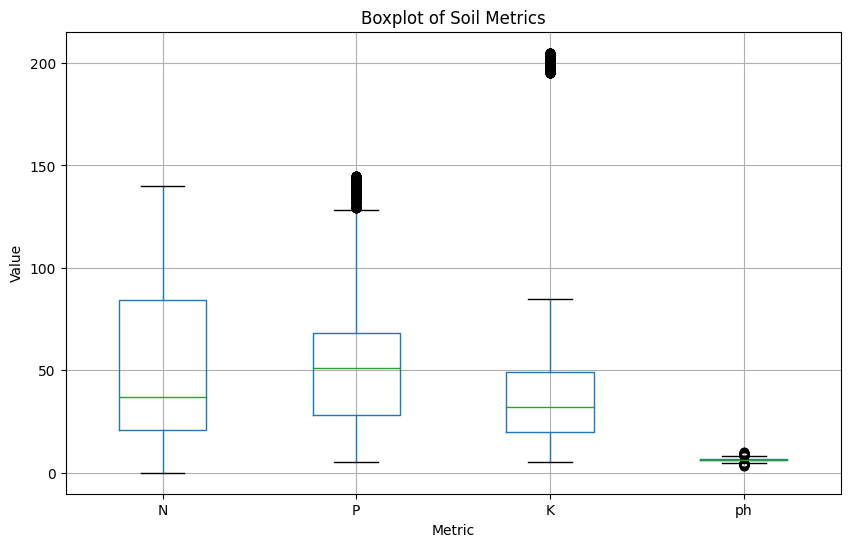

In [128]:
# Create boxplots for each numerical column
plt.figure(figsize=(10, 6))
crops.boxplot(column=['N', 'P', 'K', 'ph'])
plt.title('Boxplot of Soil Metrics')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.show()

<ipython-input-129-62cc5c20383e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = crops.mean()


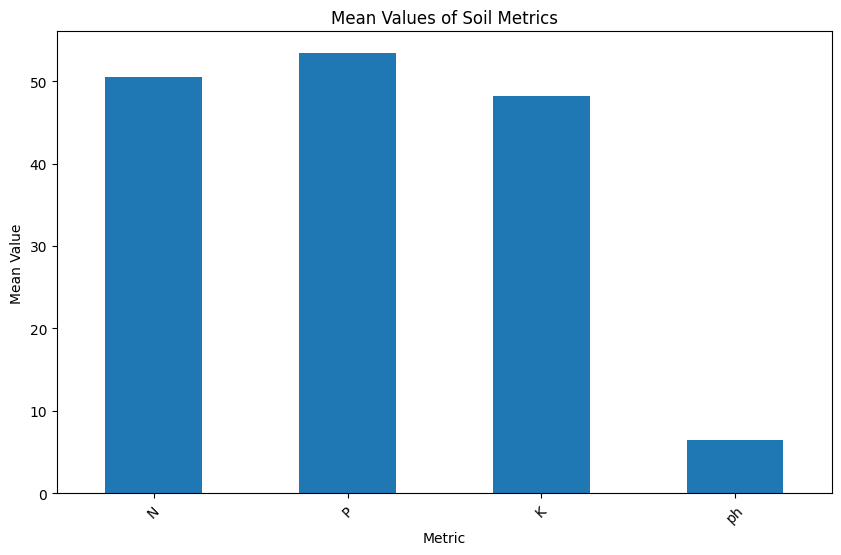

In [129]:
# Create a bar chart for the mean values of each numerical column
means = crops.mean()
plt.figure(figsize=(10, 6))
means.plot(kind='bar')
plt.title('Mean Values of Soil Metrics')
plt.ylabel('Mean Value')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.show()

<ipython-input-130-b7db87791439>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crops.corr()


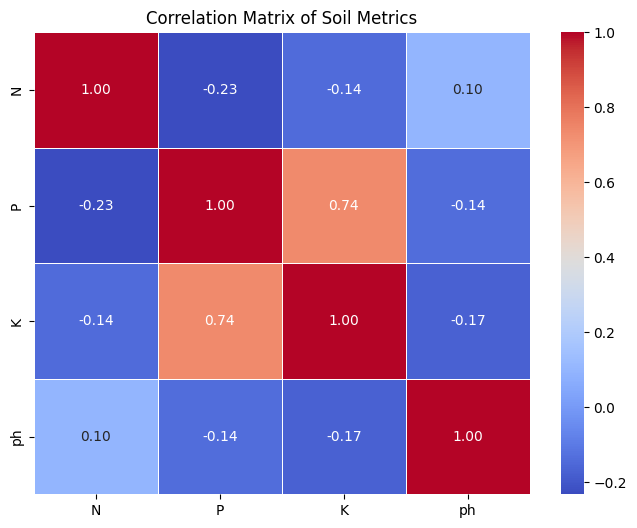

In [130]:
# Perform correlation analysis
correlation_matrix = crops.corr()

# Display correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Soil Metrics')
plt.show()

There is a moderate negative correlation (-0.231460) between nitrogen content (N) and phosphorous content (P). This means that as nitrogen content increases, phosphorous content tends to decrease.

There is a strong positive correlation (0.736232) between phosphorous content (P) and potassium content (K). This suggests that as phosphorous content increases, potassium content also tends to increase.

There is a weak negative correlation (-0.169503) between potassium content (K) and pH value (ph). This indicates that as potassium content increases, pH value tends to decrease slightly.

Other correlations, such as the correlation between nitrogen content (N) and pH value (ph), are relatively weak and close to zero.

In [131]:
# Step 4: Split data into features and target variable
X = crops.drop("crop", axis=1)
y = crops["crop"]

X contains the features (N, P, K, ph), and y contains the target variable (crop), which is the variable we want to predict using machine learning models.

In [116]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X: This is the set of features (independent variables) that we defined earlier.

y: This is the target variable (dependent variable) that we defined earlier.

test_size=0.2: This parameter specifies the proportion of the dataset to include in the testing set. Here, we are allocating 20% of the data to the testing set.

random_state=42: This parameter ensures reproducibility by fixing the random seed. It ensures that the data split is consistent across multiple runs of the code.

In [132]:
# Step 6: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The features in our dataset was scaled using the StandardScaler from scikit-learn.

Feature scaling is essential for many machine learning algorithms to ensure that features are on a similar scale, preventing certain features from dominating the others due to differences in their magnitudes.

In [118]:
# Step 7: Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

 In the above, we defined three different classifiers that we'll use to train our machine learning models for the classification task.

In [133]:
# Step 8: Train and evaluate classifiers
evaluation_scores = {}

for name, clf in classifiers.items():
    if name == "Logistic Regression":
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_scores[name] = accuracy

In [134]:
# Step 9: Print out all evaluation scores
print("\nEvaluation Scores:")
for name, score in evaluation_scores.items():
    print(f"{name}: {score}")


Evaluation Scores:
Logistic Regression: 0.6590909090909091
KNN: 0.6386363636363637
Decision Tree Classifier: 0.7727272727272727


In [135]:
# Step 10: print the best predictive feature
best_predictive_feature = max(evaluation_scores.items(), key=lambda x: x[1])
print("\nBest Predictive Feature:", best_predictive_feature)


Best Predictive Feature: ('Decision Tree Classifier', 0.7727272727272727)
